In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_sas('poverty.sas7bdat')

In [3]:
df.head()

Birth  Death  InfantDeath               Country
0   24.7    5.7         30.8            b'Albania'
1   12.5   11.9         14.4           b'Bulgaria'
2   13.4   11.7         11.3     b'Czechoslovakia'
3   12.0   12.4          7.6  b'Former E. Germany'
4   11.6   13.4         14.8            b'Hungary'

In [4]:
varc = [x for x in df.columns if x!='Country']

In [5]:
varc

['Birth', 'Death', 'InfantDeath']

In [6]:
X = df[varc].copy()

In [7]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [8]:
sc = StandardScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=varc)

In [9]:
sc = MinMaxScaler()
sc.fit(X)
Xm = pd.DataFrame(sc.transform(X),columns=varc)

In [10]:
pca = PCA(n_components=2)
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

In [11]:
pca.explained_variance_ratio_.cumsum()

array([0.781544  , 0.96200154])

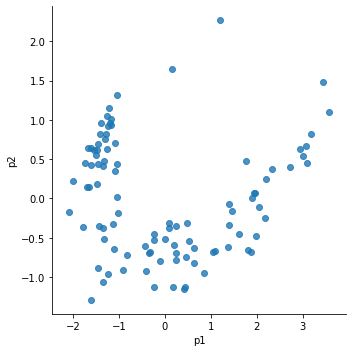

In [12]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

In [13]:
lst = []
for k in range(2,10):
    cl = KMeans(n_clusters=k)
    cl.fit(Xm)
    lst.append(cl.inertia_)

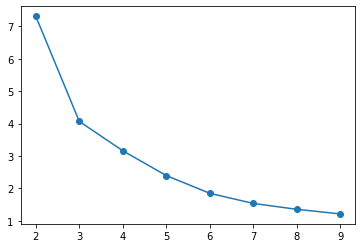

In [14]:
plt.plot(range(2,10),lst,marker='o')

In [29]:
cl = KMeans(n_clusters=6)

In [30]:
cl.fit(Xm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
df['cl']=Xm['cl']=Xs['cl']=Xp['cl']=X['cl']=cl.predict(Xm)

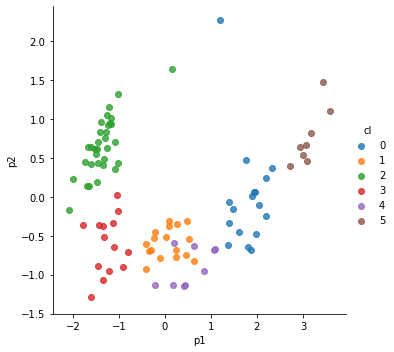

In [32]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='cl')

In [33]:
import pickle

In [34]:
pickle.dump(cl,open('cluster.pickle','wb'))

In [35]:
df[varc+['cl']].groupby('cl').mean()

Birth      Death  InfantDeath
cl                                   
0   44.382353  15.152941   102.535294
1   31.947059   8.447059    69.917647
2   13.596875  10.068750    11.331250
3   24.157143   5.564286    22.507143
4   43.244444   9.077778    62.266667
5   46.900000  21.012500   144.450000

In [36]:
df[varc].mean().to_frame().T

Birth      Death  InfantDeath
0  29.229897  10.836082    54.901031

In [44]:
df.loc[df.cl==0]['Country']

12       b'Bolivia'
22        b'Mexico'
44          b'Iran'
54    b'Bangladesh'
55      b'Cambodia'
63         b'Nepal'
73         b'Congo'
76         b'Gabon'
78         b'Ghana'
84       b'Namibia'
85       b'Nigeria'
89         b'Sudan'
90     b'Swaziland'
92        b'Uganda'
93      b'Tanzania'
94         b'Zaire'
95        b'Zambia'
Name: Country, dtype: object